In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import Birch

In [2]:
#смотрим данные
data = pd.read_csv('databank1.csv', delimiter=';')
data.head()

,Unnamed: 0,CreditSum,sex,age,EducationStatus,kolichestvo_rabotnikov_v_organizacii,Employment,OrgStanding_N,kolichestvo_detej_mladshe_18,Residence,ConfirmedMonthlyIncome (Target)
0,0,500000.0,0,49,4,3,1,1.25,0,1,30691.36
1,1,708000.0,0,44,2,0,3,20.00,0,0,25712.07
2,2,665000.0,1,29,4,2,1,2.00,1,1,31081.26
3,3,458000.0,0,59,5,1,1,23.00,0,0,17848.79
4,4,969000.0,1,51,4,3,1,9.25,2,1,115380.53


In [3]:
data.pop('Unnamed: 0')
data.pop('kolichestvo_rabotnikov_v_organizacii')
data.pop('Employment')
data.pop('EducationStatus')
data.pop('Residence')
data.pop('sex')
# data.pop('OrgStanding_N')
# data.pop('age')
# data.pop('kolichestvo_detej_mladshe_18')
data.head(10505)

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target)
0,500000.00,49,1.250000,0,30691.360
1,708000.00,44,20.000000,0,25712.070
2,665000.00,29,2.000000,1,31081.260
3,458000.00,59,23.000000,0,17848.790
4,969000.00,51,9.250000,2,115380.530
5,35000.00,35,5.500000,0,39578.970
6,701000.00,54,1.500000,0,50052.420
7,710000.00,34,9.250000,2,100050.000
8,240000.00,26,3.916666,0,34000.580
9,120400.00,23,3.000000,0,47266.040


In [4]:
X = data.values[:,0:]
X = np.nan_to_num(X)
X

array([[5.000000e+05, 4.900000e+01, 1.250000e+00, 0.000000e+00,
        3.069136e+04],
       [7.080000e+05, 4.400000e+01, 2.000000e+01, 0.000000e+00,
        2.571207e+04],
       [6.650000e+05, 2.900000e+01, 2.000000e+00, 1.000000e+00,
        3.108126e+04],
       ...,
       [6.000000e+05, 3.400000e+01, 9.000000e+00, 1.000000e+00,
        6.486240e+04],
       [3.762500e+05, 2.600000e+01, 5.000000e-01, 0.000000e+00,
        3.132647e+04],
       [1.050000e+05, 3.300000e+01, 1.000000e+01, 1.000000e+00,
        7.117874e+04]])

In [5]:
from sklearn.preprocessing import StandardScaler

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target)
cluster_pred,,,,,
0,4370,4370,4370,4370,4370
1,2355,2355,2355,2355,2355
2,408,408,408,408,408
3,455,455,455,455,455
4,252,252,252,252,252
5,1058,1058,1058,1058,1058
6,44,44,44,44,44
7,8,8,8,8,8
8,1343,1343,1343,1343,1343


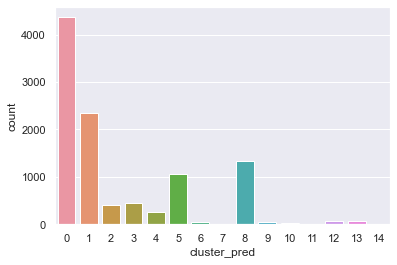

In [6]:
stscaler = StandardScaler().fit(data)
db11 = stscaler.transform(data)
brc = Birch(branching_factor=500, n_clusters=None, threshold=2.4)
brc.fit(db11)
clusters_scaled = data.copy()
clusters_scaled['cluster_pred']=brc.fit_predict(db11)
clusters_scaled
ax = sns.countplot(x="cluster_pred", data=clusters_scaled)
clusters_scaled.groupby(['cluster_pred']).count()

In [8]:
clusters_scaled

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),cluster_pred
0,500000.00,49,1.250000,0,30691.360,1
1,708000.00,44,20.000000,0,25712.070,1
2,665000.00,29,2.000000,1,31081.260,0
3,458000.00,59,23.000000,0,17848.790,5
4,969000.00,51,9.250000,2,115380.530,2
5,35000.00,35,5.500000,0,39578.970,0
6,701000.00,54,1.500000,0,50052.420,1
7,710000.00,34,9.250000,2,100050.000,2
8,240000.00,26,3.916666,0,34000.580,0
9,120400.00,23,3.000000,0,47266.040,0


In [9]:
clusters_scaled.to_csv("birchdata.csv", sep=';')

In [10]:
kolKl=15

In [11]:
kolOb=5

In [12]:
labels = brc.predict(db11)
labels

array([1, 1, 0, ..., 2, 0, 0])

In [13]:
brc.subcluster_centers_

array([[-0.30763318, -0.55121203, -0.43855656, -0.15353022, -0.19552391],
       [ 0.2544329 ,  1.08448831,  0.25973051, -0.52234702, -0.2501977 ],
       [ 0.94209395, -0.21592354, -0.11607384,  1.43248243,  1.77064489],
       [ 2.53383345, -0.14535509, -0.24058069, -0.05787813,  0.76432747],
       [ 0.10732723,  0.24893646,  0.01566534, -0.31731213,  2.65781448],
       [-0.05920138,  1.14356848,  2.40371545, -0.54558712, -0.30236444],
       [ 0.48435084,  0.18757404, -0.02932607,  0.88780753,  6.93277086],
       [ 5.51709217,  0.0376479 , -0.12216247,  1.66452917,  7.87847635],
       [-0.17592917, -0.31171486, -0.10970486,  1.79997718, -0.04362455],
       [ 0.89785738, -0.1968296 , -0.08136784,  4.39644667,  0.20520951],
       [ 5.98458329,  0.51706287,  0.16505206, -0.34423369,  3.32557207],
       [ 7.35398393,  0.14715064, -0.26459819,  1.81518639,  2.5089354 ],
       [ 1.63434739,  0.40870607, -0.14765092,  0.54239268,  4.88264562],
       [ 3.15319217,  1.40561493,  2.5

In [14]:
import math
from math import sqrt

In [15]:
# кол-во элементов в каждом кластере
N = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for l in range(0,kolKl):
    N[l] = clusters_scaled.groupby(['cluster_pred'])['CreditSum'].count()[l]
    print(N[l])

4370
2355
408
455
252
1058
44
8
1343
46
26
7
67
60
6


In [16]:
# общий центр (координаты)
obcentrx = [0,0,0,0,0,0,0,0,0,0,0]
# j - номер признака
for j in range(0,kolOb):
    for l in range(0,kolKl):
        obcentrx[j] = obcentrx[j]+N[l]*brc.subcluster_centers_[l][j]
    obcentrx[j]=obcentrx[j]/10505
    print(obcentrx[j])

0.11262740041837717
0.09230879461553858
0.10231560010801555
0.06486423337800325
0.07556420972803192


In [17]:
# вычисляем евклидово расстояние от центра кластера до общего центра
d=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
d2=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for l in range(0,kolKl):
    for j in range(0,kolOb):
        d2[l] = d2[l]+(brc.subcluster_centers_[l][j]-obcentrx[j])**2 
        d[l] = math.sqrt(d2[l])
    print(d[l])
    print(d2[l])

1.0022303118651124
1.0044655980212402
1.2166537417858103
1.480246327401413
2.3610154452412466
5.574393932667721
2.5545569562024717
6.525761242482437
2.6165136757534966
6.846143815405075
2.6356392420459445
6.946594214212522
6.918316414359787
47.86310200920006
9.628394648122903
92.70598350000175
1.8210644134727576
3.3162755980168783
4.41739075138115
19.513341050387723
6.73751661017834
45.394130072429036
7.846005398244034
61.559800709274526
5.080776253707668
25.814287340239733
4.262625196371796
18.169973564743692
8.378075257598352
70.1921450219817


In [18]:
# средневзвешенный разброс от центра кластера до общего центра (межкластерное расстояние)
k=0
k2=0
for l in range(0,kolKl):
    k=k+N[l]*d[l]
    k2=k2+N[l]*d2[l]
k=k/10505
k2=k2/10505
print (k)
print (k2)
SSM=k2

1.5921284635044344
3.355056113267966


In [19]:
# средний разброс в каждом кластере от объектов до центра кластера
s1=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s2=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
a1=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(0, 10505):
    #dd - расстояние от i-го объекта до центра его кластера
    dd=0
    dd2=0
    l=clusters_scaled['cluster_pred'][i]
    a1[l]=a1[l]+1
    for j in range(0,kolOb):
        dd2=dd2+(db11[i][j]-brc.subcluster_centers_[l][j])**2
    dd= math.sqrt(dd2)   
    s1[l] = s1[l]+ dd
    s2[l]=s2[l]+dd2
for l in range(0, kolKl):
    s1[l]=s1[l]/a1[l]
    s2[l]=s2[l]/a1[l]
    print(a1[l])
    print(s1[l])
    print(s2[l])

4370
1.245081489546283
1.6182369755409975
2355
1.2971829933583625
1.8233943680558709
408
1.4693187806182881
2.368180951683463
455
1.6417669412580316
2.867506284076851
252
1.6549363637589263
2.918143534093746
1058
1.2614488904132064
1.7751972622715275
44
2.0267229711952477
4.657150161138759
8
2.1695982881360205
5.2565989486629805
1343
1.192431010020769
1.5882977195907737
46
1.855438485114034
3.9257465768866813
26
2.0518947036000394
4.422949145654051
7
2.1850292181063296
5.091365360200023
67
1.8158958112666208
3.5186765247595093
60
1.7836221127491863
3.4310315126267357
6
1.2568988701601898
1.624968964121981


In [20]:
# средний внутрикластерный разброс по всем кластерам
k=0
k2=0
for l in range(0,kolKl):
    k=k+N[l]*s1[l]
    k2=k2+N[l]*s2[l]
k=k/10507
k2=k2/10507
print (k)
print (k2)
SSV=k2

1.3031503558710598
1.8476147546529638


In [21]:
# средний разброс от объектов до общего центра 
s2=0
s4=0
for i in range(0, 10505):
    #dd - расстояние от i-го объекта до общего центра
    dd=0
    dd2=0
    for j in range(0,kolOb):
        dd2=dd2+(db11[i][j]-obcentrx[j])**2
    dd= math.sqrt(dd2)   
    s2 = s2+dd
    s4 = s4+dd2
s2=s2/10505
s4=s4/10505
print(s2)
print(s4)
SS=s4

2.0705170921902787
5.041591645477371


In [22]:
# доля межгруппового разброса в общем разбросе
dol=SSM/SS
dol

0.6654755777925143

In [23]:
# data.pop('kolichestvo_rabotnikov_v_organizacii')
# data.pop('Employment')
# data.pop('EducationStatus')
# data.pop('Residence')
# data.pop('sex')
# (15 кластеров)
# 0.6654755777925143

In [24]:
# data.pop('kolichestvo_rabotnikov_v_organizacii')
# data.pop('Employment')
# data.pop('EducationStatus')
# data.pop('Residence')
# data.pop('sex')
# data.pop('age')
# (15 кластеров)
# 0.7042786001449356

In [25]:
# data.pop('kolichestvo_rabotnikov_v_organizacii')
# data.pop('Employment')
# data.pop('EducationStatus')
# data.pop('Residence')
# data.pop('sex')
# data.pop('kolichestvo_detej_mladshe_18')
# (13 кластеров)
# 0.628678809478369

In [26]:
# data.pop('kolichestvo_rabotnikov_v_organizacii')
# data.pop('Residence')
# data.pop('sex')
# (14 кластеров)
# 0.5775078916303228

In [27]:
# data.pop('kolichestvo_rabotnikov_v_organizacii')
# data.pop('Employment')
# data.pop('EducationStatus')
# data.pop('Residence')
# data.pop('sex')
# data.pop('OrgStanding_N')
# (10 кластеров)
# 0.5195411983648272

In [28]:
# data.pop('kolichestvo_rabotnikov_v_organizacii')
# data.pop('Employment')
# data.pop('Residence')
# data.pop('sex')
# (11 кластеров)
# 0.49470682900257207

In [29]:
# работа со всеми параметрами (12 кластеров)
# 0.4120461200466354

In [30]:
# data.pop('kolichestvo_rabotnikov_v_organizacii') (11 кластеров)
# 0.3736337486766097

In [31]:
# data.pop('Employment') (11 кластеров)
# 0.3498531070899322

In [32]:
# data.pop('EducationStatus') (11 кластеров)
# 0.40791455806066546

In [33]:
# data.pop('Residence') (13 кластеров)
# 0.3955415455100541

In [34]:
# data.pop('sex') (15 кластеров)
# 0.4569056947161065

In [35]:
# data.pop('OrgStanding_N') (9 кластеров)
# 0.3244816221646878

In [36]:
# data.pop('age') (13 кластеров)
# 0.3927819308808777

In [37]:
# data.pop('kolichestvo_detej_mladshe_18') (11 кластеров)
# 0.2841863433295343

In [7]:
import researchpy as rp
rp.summary_cont(clusters_scaled['CreditSum'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,CreditSum,10505.0,401146.6904,309452.4029,3019.2274,395228.4314,407064.9494


In [12]:
rp.summary_cont(clusters_scaled['ConfirmedMonthlyIncome (Target)'].groupby(clusters_scaled['cluster_pred']))

,N,Mean,SD,SE,95% Conf.,Interval
cluster_pred,,,,,,
0,4370,33757.3973,13102.1946,198.1999,33368.8251,34145.9695
1,2355,31031.9893,14017.6668,288.8553,30465.5521,31598.4264
2,408,79883.8298,20238.0809,1001.9343,77914.2176,81853.4420
3,455,53430.1479,19206.0593,900.3939,51660.6911,55199.6048
4,252,102559.8671,21881.6173,1378.4123,99845.1388,105274.5953
5,1058,31318.7289,13514.0643,415.4733,30503.4826,32133.9751
6,44,230750.6680,31253.1736,4711.5932,221248.8347,240252.5012
7,8,250259.8375,25281.7129,8938.4353,229123.7966,271395.8784
8,1343,38191.4691,13803.9657,376.6742,37452.5348,38930.4033


In [56]:
# дисперсионный анализ
import matplotlib
matplotlib.use('TkAgg')
import scipy.stats as stats

In [57]:
stats.f_oneway(clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 0],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 1],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 2],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 3],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 4],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 5],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 6],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 7],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 8],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 9],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 10],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 11],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 12],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 13],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 14])

F_onewayResult(statistic=733.2582050483607, pvalue=0.0)

In [58]:
stats.f_oneway(clusters_scaled['age'][clusters_scaled['cluster_pred'] == 0],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 1],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 2],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 3],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 4],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 5],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 6],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 7],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 8],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 9],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 10],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 11],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 12],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 13],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 14])

F_onewayResult(statistic=1568.4587003865968, pvalue=0.0)

In [59]:
stats.f_oneway(clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 0],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 1],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 2],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 3],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 4],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 5],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 6],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 7],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 8],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 9],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 10],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 11],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 12],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 13],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 14])

F_onewayResult(statistic=1582.6068446394409, pvalue=0.0)

In [60]:
stats.f_oneway(clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 0],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 1],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 2],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 3],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 4],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 5],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 6],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 7],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 8],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 9],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 10],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 11],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 12],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 13],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 14])

F_onewayResult(statistic=1712.4907928949483, pvalue=0.0)

In [61]:
stats.f_oneway(clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 0],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 1],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 2],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 3],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 4],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 5],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 6],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 7],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 8],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 9],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 10],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 11],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 12],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 13],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 14])

F_onewayResult(statistic=1786.7002018198032, pvalue=0.0)

In [62]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('CreditSum ~ cluster_pred', data=clusters_scaled).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster_pred,5.532818e+13,1.0,611.347179,3.075341e-131
Residual,9.505432e+14,10503.0,NaN,NaN


In [63]:
bins = [-1, 0, 1, 2, 3,4,5,6,7,8,9, 10,11,12,13,20]
# bins = [-1, 0, 1, 2, 3, 10]
# labels = ['Нулевой', 'Первый','Второй','Третий','Четвертый']
labels = ['Нулевой', 'Первый','Второй','Третий','Четвертый','Пятый','Шестой','Седьмой','Восьмой','Девятый',
          'Десятый','Одиннадцатый','Двенадцатый','Тринадцатый','Четырнадцатый']

clusters_scaled['cluster_pred_cat'] = pd.cut(clusters_scaled['cluster_pred'], bins=bins, labels=labels)

In [64]:
clusters_scaled.head()

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),cluster_pred,cluster_pred_cat
0,500000.0,49,1.25,0,30691.36,1,Первый
1,708000.0,44,20.00,0,25712.07,1,Первый
2,665000.0,29,2.00,1,31081.26,0,Нулевой
3,458000.0,59,23.00,0,17848.79,5,Пятый
4,969000.0,51,9.25,2,115380.53,2,Второй


In [65]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('CreditSum ~ cluster_pred_cat', data=clusters_scaled).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster_pred_cat,4.974985e+14,14.0,733.258205,0.0
Residual,5.083728e+14,10490.0,NaN,NaN


In [67]:
model = ols('age ~ cluster_pred_cat', data=clusters_scaled).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster_pred_cat,848647.242187,14.0,1568.4587,0.0
Residual,405416.639203,10490.0,NaN,NaN


In [69]:
model = ols('OrgStanding_N ~ cluster_pred_cat', data=clusters_scaled).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster_pred_cat,494311.725598,14.0,1582.606845,0.0
Residual,234032.043807,10490.0,NaN,NaN


In [71]:
model = ols('kolichestvo_detej_mladshe_18 ~ cluster_pred_cat', data=clusters_scaled).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster_pred_cat,5030.554245,14.0,1712.490793,0.0
Residual,2201.076027,10490.0,NaN,NaN


In [72]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
cluster_pred_cat,5030.554245,14.0,359.325303,1712.490793,0.0,0.695632,0.695206
Residual,2201.076027,10490.0,0.209826,NaN,NaN,NaN,NaN


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\asus\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "C:\Users\asus\Anaconda3\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 393, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1535, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x000002AF2BBFD630>
Exception in Tkinter callback
Traceback (mo

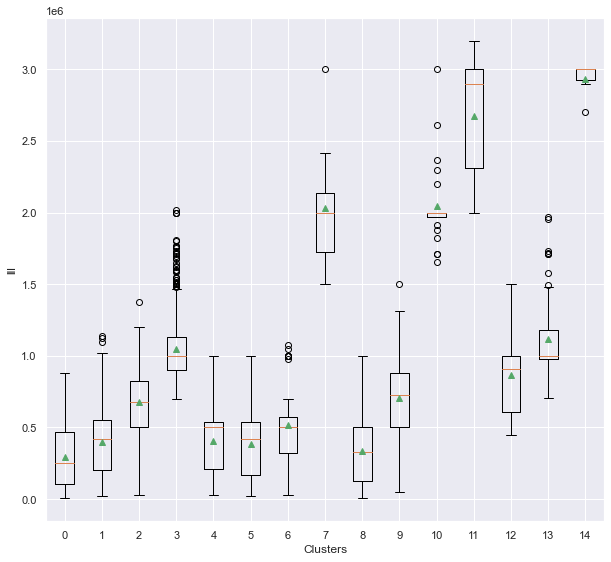

In [47]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

# ax.set_title("Box Plot of Libido by Dosage", fontsize= 20)
ax.set

data = [clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 0],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 1],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 2],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 3],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 4],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 5],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 6],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 7],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 8],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 9],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 10],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 11],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 12],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 13],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 14]]

ax.boxplot(data,
           labels= ['0', '1', '2', '3', '4','5', '6', '7', '8', '9','10', '11', '12', '13', '14'],
#            labels= ['0', '1', '2', '3'],
           showmeans= True)

plt.xlabel("Clusters")
plt.ylabel("lll")

plt.show()


In [75]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(clusters_scaled['CreditSum'], clusters_scaled['cluster_pred'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,108097.4577,0.001,89007.9393,127186.9761,True
0,2,385223.7416,0.001,346565.9291,423881.554,True
0,3,758711.2138,0.001,721924.8176,795497.61,True
0,4,113845.9125,0.001,65466.6789,162225.1461,True
0,5,94528.6869,0.001,68941.5691,120115.8048,True
0,6,229061.7585,0.001,115917.0859,342206.4311,True
0,7,1741232.9603,0.001,1476969.4686,2005496.452,True
0,8,45592.4456,0.001,22293.3862,68891.5051,True
0,9,415194.2194,0.001,304511.4798,525876.9591,True
0,10,1751765.3868,0.001,1604877.3414,1898653.4322,True


In [49]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(clusters_scaled['CreditSum'], clusters_scaled['cluster_pred'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl


group1,group2,stat,pval,pval_corr,reject
0,1,-19.7786,0.0,0.0,True
0,2,-36.0072,0.0,0.0,True
0,3,-74.183,0.0,0.0,True
0,4,-8.5415,0.0,0.0,True
0,5,-13.2509,0.0,0.0,True
0,6,-7.3769,0.0,0.0,True
0,7,-24.0211,0.0,0.0,True
0,8,-7.0455,0.0,0.0,True
0,9,-13.6521,0.0,0.0,True
0,10,-43.5404,0.0,0.0,True


In [50]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(clusters_scaled['CreditSum'], clusters_scaled['cluster_pred'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "sidak")

tbl

group1,group2,stat,pval,pval_corr,reject
0,1,-19.7786,0.0,0.0,True
0,2,-36.0072,0.0,0.0,True
0,3,-74.183,0.0,0.0,True
0,4,-8.5415,0.0,0.0,True
0,5,-13.2509,0.0,0.0,True
0,6,-7.3769,0.0,0.0,True
0,7,-24.0211,0.0,0.0,True
0,8,-7.0455,0.0,0.0,True
0,9,-13.6521,0.0,0.0,True
0,10,-43.5404,0.0,0.0,True


In [51]:
from scipy import stats
f_value, p_value = stats.f_oneway(clusters_scaled['CreditSum'], clusters_scaled['cluster_pred'])
p_value

0.0

C:\Users\asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\nonparametric

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\asus\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "C:\Users\asus\Anaconda3\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 393, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1535, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x000002AF3E67CDD8>
Exception in Tkinter callback
Traceback (mo

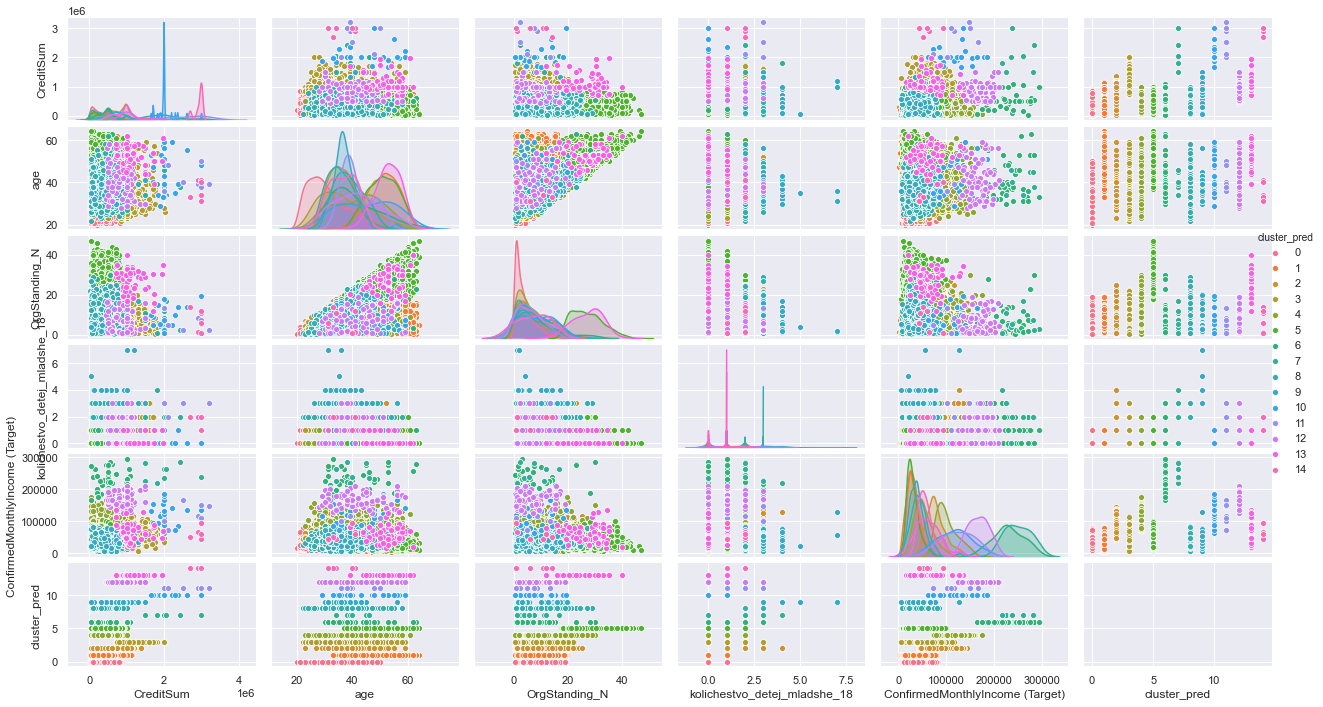

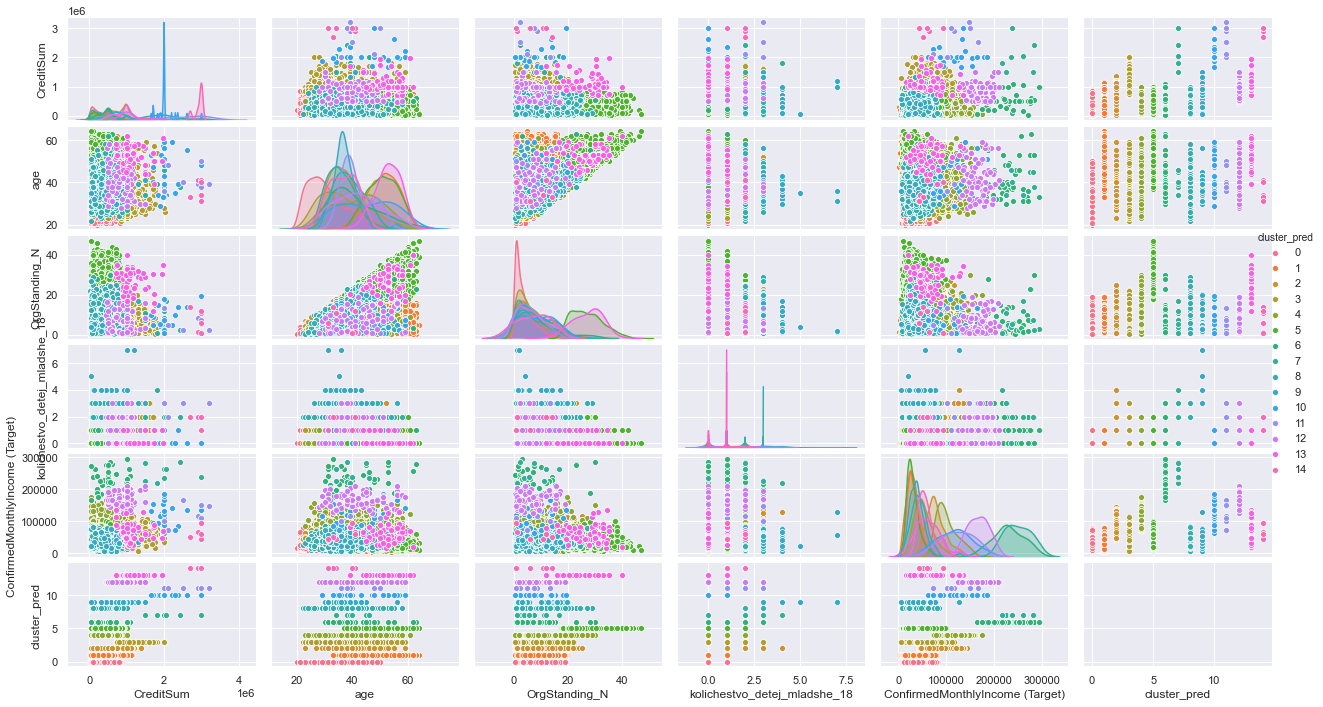

In [55]:
sns.pairplot(clusters_scaled, hue='cluster_pred', size=5, diag_kind='kde')
sns_plot = sns.pairplot(clusters_scaled, hue='cluster_pred', size=5, diag_kind='kde')
sns_plot.savefig("birchimg.png")